<a href="https://colab.research.google.com/github/Sans2326/CUREYA_WEEK2/blob/main/Week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **HOUSE PRICE PREDICTION**

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

# Data features :

CRIM: Per capita crime rate by town

ZN: Proportion of residential land zoned for lots over 25,000 sq. ft

INDUS: Proportion of non-retail business acres per town

CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

NOX: Nitric oxide concentration (parts per 10 million)

RM: Average number of rooms per dwelling

AGE: Proportion of owner-occupied units built prior to 1940

DIS: Weighted distances to five Boston employment centers

RAD: Index of accessibility to radial highways

TAX: Full-value property tax rate per $10,000

B: 1000(Bk - 0.63)², where Bk is the proportion of [people of African American descent] by town

LSTAT: Percentage of lower status of the population

MEDV: Median value of owner-occupied homes in $1000s

In [ ]:
data = pd.read_csv("/content/gdrive/MyDrive/HousingData.csv")
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [ ]:
# finding unique values in each coloumn
for col in data.columns:
  print(col, ": ", len(data[col].unique()))
# data.nunique()

CRIM :  485
ZN :  27
INDUS :  77
CHAS :  3
NOX :  81
RM :  446
AGE :  349
DIS :  412
RAD :  9
TAX :  66
PTRATIO :  46
B :  357
LSTAT :  439
MEDV :  229


In [ ]:
# let's examine how many columns we will obtain after one hot encoding these variable
pd.get_dummies(data[:3], drop_first=True).shape

(3, 14)

In [ ]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560262,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


# DATA PREPROCCESSING

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [ ]:
#renaming coloumn MEDV to PRICE
data.rename(columns={"MEDV":"PRICE"}, inplace=True)
data.head(1)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.09,1,296,15.3,396.9,4.98,24.0


In [ ]:
#checking no of misssing values:
miss_col = []
for col in data.columns:
  if((data[col].isnull()).sum() >=1):
    print(col, data[col].isnull().sum())
    miss_col.append(col)

CRIM 20
ZN 20
INDUS 20
CHAS 20
AGE 20
LSTAT 20


In [ ]:
#replacing null values in a particular column with its mean value
for i in miss_col:
  data[i] = data[i].replace(np.NaN, data[i].mean())

In [ ]:
data[data.isnull().any(axis = 1)]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
6,0.08829,12.5,7.87,NaN,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
9,0.17004,12.5,7.87,NaN,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9
14,0.63796,0.0,8.14,NaN,0.538,6.096,84.5,4.4619,4,307,21.0,380.02,10.26,18.2
35,0.06417,0.0,5.96,0.0,0.499,5.933,68.2,3.3603,5,279,19.2,396.90,NaN,18.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
473,4.64689,0.0,18.10,0.0,0.614,6.980,67.6,2.5329,24,666,20.2,374.68,NaN,29.8
479,14.33370,0.0,18.10,NaN,0.614,6.229,88.0,1.9512,24,666,20.2,383.32,13.11,21.4
482,5.73116,0.0,18.10,NaN,0.532,7.061,77.0,3.4106,24,666,20.2,395.28,7.01,25.0
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4


In [ ]:
corr = data.corr()
corr

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
CRIM,1.000000,-0.191178,0.401863,-0.054355,0.417130,-0.219150,0.354342,-0.374166,0.624765,0.580595,0.281110,-0.381411,0.444943,-0.391363
ZN,-0.191178,1.000000,-0.531871,-0.037229,-0.513704,0.320800,-0.563801,0.656739,-0.310919,-0.312371,-0.414046,0.171303,-0.414193,0.373136
INDUS,0.401863,-0.531871,1.000000,0.059859,0.764866,-0.390234,0.638431,-0.711709,0.604533,0.731055,0.390954,-0.360532,0.590690,-0.481772
CHAS,-0.054355,-0.037229,0.059859,1.000000,0.075097,0.104885,0.078831,-0.093971,0.001468,-0.032304,-0.111304,0.051264,-0.047424,0.181391
NOX,0.417130,-0.513704,0.764866,0.075097,1.000000,-0.302188,0.731548,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.582641,-0.427321
RM,-0.219150,0.320800,-0.390234,0.104885,-0.302188,1.000000,-0.247337,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.614339,0.695360
AGE,0.354342,-0.563801,0.638431,0.078831,0.731548,-0.247337,1.000000,-0.744844,0.458349,0.509114,0.269226,-0.275303,0.602891,-0.394656
DIS,-0.374166,0.656739,-0.711709,-0.093971,-0.769230,0.205246,-0.744844,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.493328,0.249929
RAD,0.624765,-0.310919,0.604533,0.001468,0.611441,-0.209847,0.458349,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.479541,-0.381626
TAX,0.580595,-0.312371,0.731055,-0.032304,0.668023,-0.292048,0.509114,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.536110,-0.468536


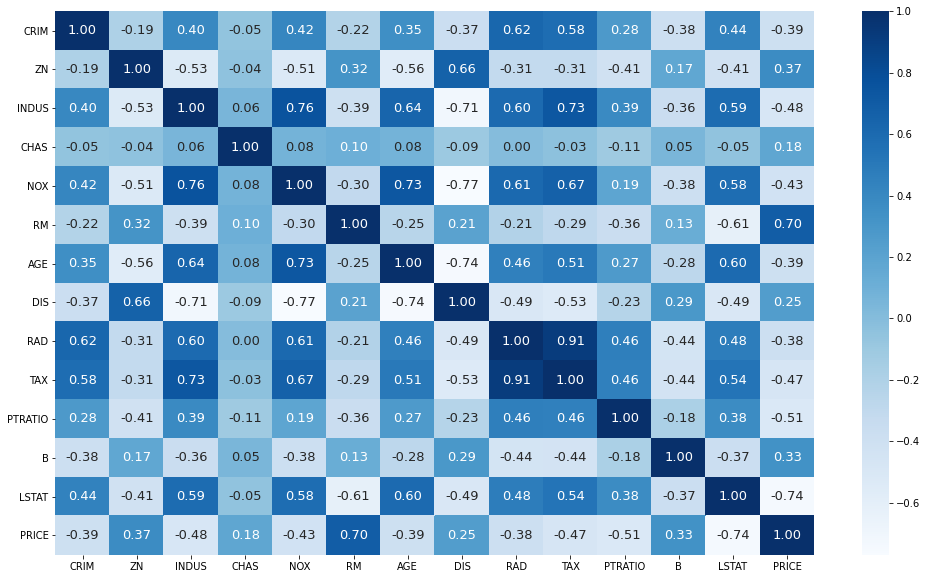

In [ ]:
plt.figure(figsize=(17,10))
sns.heatmap(corr, annot= True, fmt='.2f', annot_kws={'size':13}, cmap='Blues')
# value of correlation coefficient ranges in between -1 and 1
#used to measure relationship between two variables

# OBSERVATION

*   There is a strong positive correlation between PRICE and RM(0.7)
*   There is a strong negative correlatipn between PRICE and LSTAT
*   CRIM, INDUS, NOX, AGE, RAD, TAX, PTRATIO, LSTAT(**Negative Correlation**)
*   ZN, CHAS, RM, DIS, B(**Positive Correlation**)



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


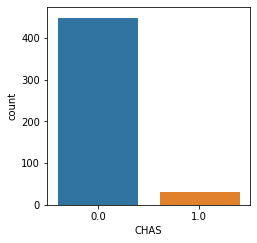

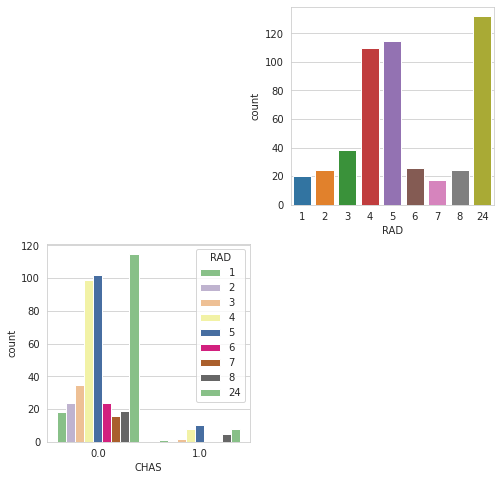

In [ ]:
#plt.figure(figsize=(18,10))
for i,feature in enumerate(['CHAS', 'RAD']):
  plt.figure(figsize = (8,8))
  plt.subplot(2,2,i+1)
  sns.set_style('whitegrid')
  sns.countplot(x=feature, data=data)
plt.subplot(2,2,3)
sns.set_style(style='whitegrid')
sns.countplot(data['CHAS'], hue = data['RAD'], palette="Accent")

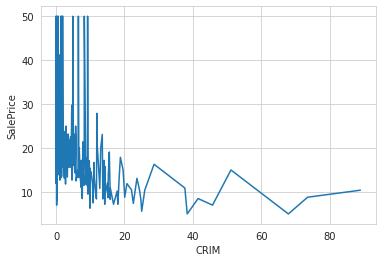

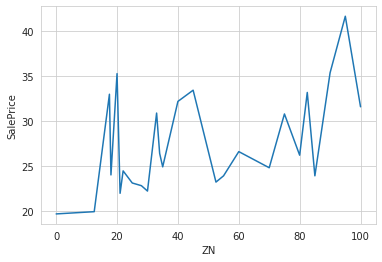

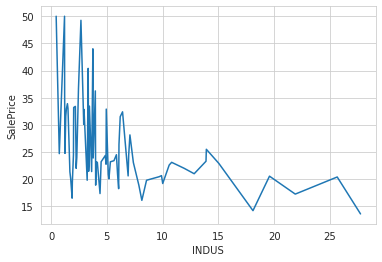

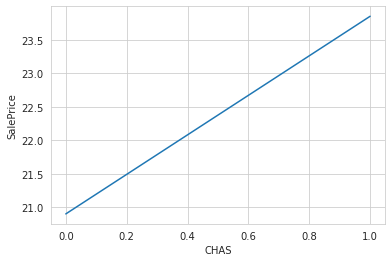

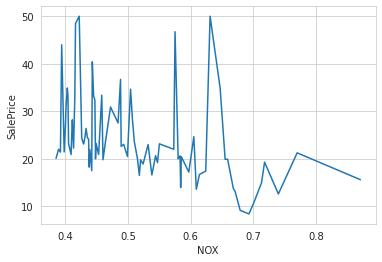

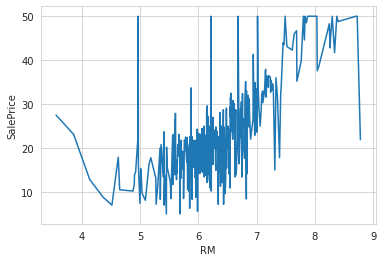

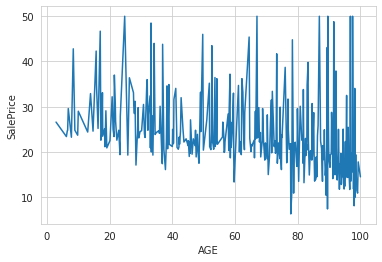

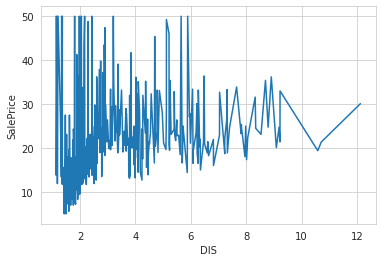

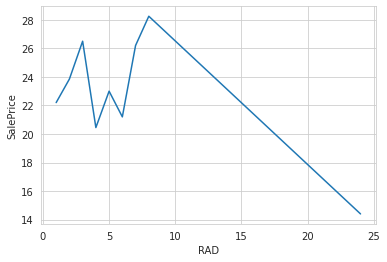

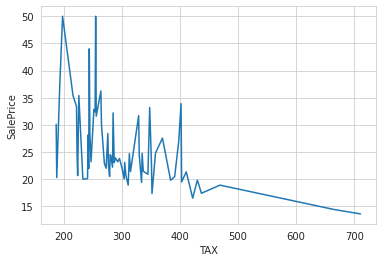

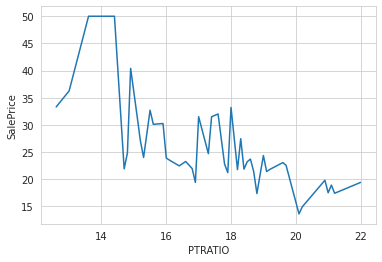

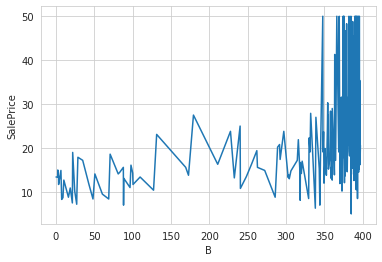

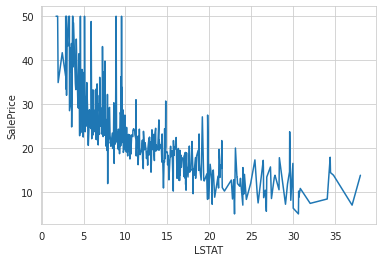

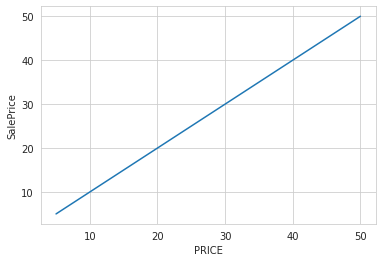

In [ ]:
for feature in data.columns:
        datas=data.copy()
        datas.groupby(feature)['PRICE'].median().plot()
        #plt.scatter(data[feature], data['PRICE'])
        plt.xlabel(feature)
        plt.ylabel('SalePrice')
        plt.show()

# OBSERVATION

*  It can be observed that PRICE increases with the increase in RM(Avg no of room per dwelling).
*  PRICE tends to decrease with the increase in LSTAT.
*  For maximum rise in PRICE, TAX value lies below 500 USD.
*  DIS(Weighted distances to five Boston employment centers) is less for houses with higher price.
*  CRIM(per capita crime rate in town) is also less for houses with high price.

# LINEAR REGRESSION

In [ ]:
X = data.drop(['PRICE'], axis = 1)
Y = np.round(data['PRICE'])
print(X.head(), Y)

      CRIM    ZN  INDUS  CHAS    NOX  ...  RAD  TAX  PTRATIO       B      LSTAT
0  0.00632  18.0   2.31   0.0  0.538  ...    1  296     15.3  396.90   4.980000
1  0.02731   0.0   7.07   0.0  0.469  ...    2  242     17.8  396.90   9.140000
2  0.02729   0.0   7.07   0.0  0.469  ...    2  242     17.8  392.83   4.030000
3  0.03237   0.0   2.18   0.0  0.458  ...    3  222     18.7  394.63   2.940000
4  0.06905   0.0   2.18   0.0  0.458  ...    3  222     18.7  396.90  12.715432

[5 rows x 13 columns] 0      24.0
1      22.0
2      35.0
3      33.0
4      36.0
       ... 
501    22.0
502    21.0
503    24.0
504    22.0
505    12.0
Name: PRICE, Length: 506, dtype: float64


In [ ]:
#splitting dataset
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)

In [ ]:
#creating object of class
clf = LinearRegression()

In [ ]:
#training data
clf.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
#predicting test data
predicted = clf.predict(x_test)
train_predict = clf.predict(x_train)

In [ ]:
y_test

153    19.4
299    29.0
129    14.3
97     38.7
189    34.9
       ... 
466    19.0
163    50.0
384     8.8
319    21.0
377    13.3
Name: PRICE, Length: 102, dtype: float64

In [ ]:
clf.score(x_test, y_test)

0.686314908690161

In [ ]:
#calculating error and accuracy
from sklearn import metrics

print("The model performance for training dataset\n")
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_train, train_predict))
print("Mean Squared Error: ", metrics.mean_squared_error(y_train, train_predict))
print("R^2 Score: ", metrics.r2_score(y_train, train_predict))
print("Training Accuracy:",clf.score(x_train,y_train)*100)
print("\n*****************************************\n")
print("The model performance for testing dataset\n")
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, predicted))
print("Mean Squared Error: ", metrics.mean_squared_error(y_test, predicted))
print("R^2 Score: ", metrics.r2_score(y_test, predicted))
print("Testing Accuracy:",clf.score(x_test, y_test)*100)

The model performance for training dataset

Mean Absolute Error:  3.354777570641636
Mean Squared Error:  22.648919980428392
R^2 Score:  0.7269536507182017
Training Accuracy: 72.69536507182018

*****************************************

The model performance for testing dataset

Mean Absolute Error:  3.2898571229087867
Mean Squared Error:  24.783405421056294
R^2 Score:  0.7252710833417652
Testing Accuracy: 72.52710833417652


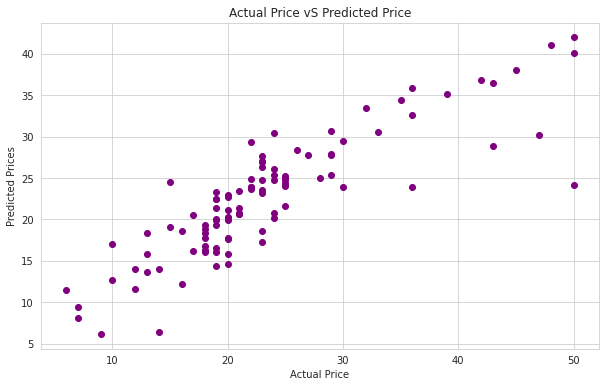

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(y_test, predicted, color = 'purple')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vS Predicted Price")
plt.show()

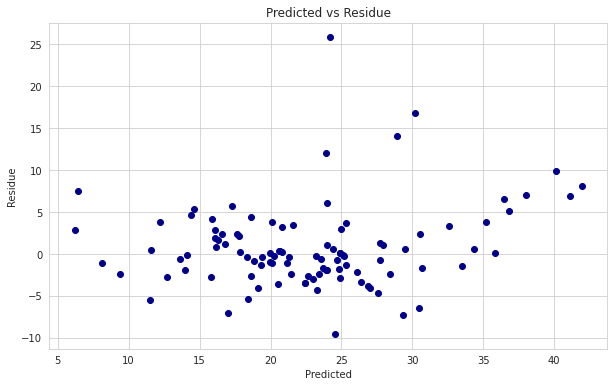

In [ ]:
# PREDICTED VS RESIDUE
#  Residuals are defined as the difference between the observed or actual value of target variable and predicted value of target variable.
plt.figure(figsize=(10,6))
plt.scatter(predicted, y_test - predicted, color = 'darkblue')
plt.xlabel("Predicted")
plt.ylabel("Residue")
plt.title("Predicted vs Residue")
plt.show()

# KNN

In [ ]:
from numba import jit
import matplotlib.pyplot as pyplot
from sklearn.datasets import make_regression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score

In [ ]:
TargetVariable='PRICE'
Predictors=['RM', 'PTRATIO', 'LSTAT', 'RAD', 'CHAS']

In [ ]:

RegModel = KNeighborsRegressor(n_neighbors=3)

print(RegModel)

KNN=RegModel.fit(x_train, y_train)
prediction=KNN.predict(x_test)
train_prediction = KNN.predict(x_train)
print('R2 Value:',metrics.r2_score(y_train, KNN.predict(x_train)))

print('\n##### Model Validation and Accuracy Calculations ##########')

TestingDataResults=pd.DataFrame(data=x_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(predicted)

print(TestingDataResults.head())

TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['PRICE']-TestingDataResults['PredictedPRICE']))/TestingDataResults['PRICE'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy)
print('Median Accuracy on test data:', MedianAccuracy)

def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    return(100-MAPE)

from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)
from sklearn.model_selection import cross_val_score
Accuracy_Values=cross_val_score(RegModel, X , Y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')
R2 Value: 0.7561227452098762

##### Model Validation and Accuracy Calculations ##########
        RM  PTRATIO  LSTAT  RAD  CHAS  PRICE  PredictedPRICE
108  6.474     20.9  12.27    5   0.0   20.0            23.0
109  6.229     20.9  15.55    5   0.0   19.0            20.0
316  5.914     18.4  18.33    4   0.0   18.0            18.0
261  7.520     13.0   7.26    5   0.0   43.0            36.0
210  5.960     18.6  17.27    4   1.0   22.0            24.0
Mean Accuracy on test data: 85.27305241390535
Median Accuracy on test data: 89.3796992481203

Accuracy values for 10-fold Cross Validation:
 [55.69679974 74.66474124 29.03678746 72.16818053 78.769187   76.51876399
 74.61597359 51.39783487 61.70306469 70.09459855]

Final Average Accuracy of the model: 64.47


In [ ]:
print("The model performance for training dataset\n")
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_train, train_prediction))
print("Mean Squared Error: ", metrics.mean_squared_error(y_train, train_prediction))
print("R^2 Score: ", metrics.r2_score(y_train, train_prediction))
print("Training Accuracy:",clf.score(x_train,y_train)*100)
print("\n*****************************************\n")
print("The model performance for testing dataset\n")
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, prediction))
print("Mean Squared Error: ", metrics.mean_squared_error(y_test, prediction))
print("R^2 Score: ", metrics.r2_score(y_test, prediction))
print("Testing Accuracy:",clf.score(x_test, y_test)*100)

The model performance for training dataset

Mean Absolute Error:  3.011551155115512
Mean Squared Error:  20.22937293729373
R^2 Score:  0.7561227452098762
Training Accuracy: 72.69536507182018

*****************************************

The model performance for testing dataset

Mean Absolute Error:  4.473856209150327
Mean Squared Error:  47.19498910675381
R^2 Score:  0.47683427645582
Testing Accuracy: 72.52710833417652


# Websites/Articles used



*   https://stackoverflow.com/
*   https://towardsdatascience.com/
*   https://www.youtube.com/user/krishnaik06/featured
*   https://www.kaggle.com/altavish/boston-housing-dataset?select=HousingData.csv



